In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [12]:
%store -r sub_data

In [13]:
X = sub_data.drop(columns='Health_status')

y = sub_data['Health_status'].astype(int)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
lr = LogisticRegression(class_weight='balanced', max_iter=1000, solver='lbfgs', penalty= None)


In [16]:
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, penalty=None)

In [17]:
y_pred = lr.predict(X_test)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76       657
           1       0.39      0.71      0.50       194

    accuracy                           0.68       851
   macro avg       0.64      0.69      0.63       851
weighted avg       0.77      0.68      0.70       851



In [19]:
print( confusion_matrix(y_test,y_pred))

[[438 219]
 [ 56 138]]


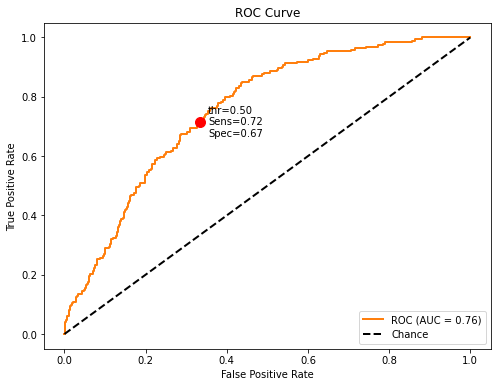

In [20]:
y_proba = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, 'C1-', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--', lw=2, label='Chance')
# annotate threshold=0.5
ix = np.argmin(np.abs(thresholds - 0.5))
plt.scatter(fpr[ix], tpr[ix], c='red', s=100, zorder=5)
plt.text(
    fpr[ix]+0.02, tpr[ix]-0.05,
    f"thr={thresholds[ix]:.2f}\nSens={tpr[ix]:.2f}\nSpec={(1-fpr[ix]):.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [21]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=20, random_state=42)
scores = cross_val_score(lr, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
print("All 100 accuracies:\n", scores)

print(f"\nMean accuracy: {scores.mean():.4f}")
print(f"Std  accuracy: {scores.std():.4f}")

All 100 accuracies:
 [0.73090482 0.68625147 0.67685076 0.7027027  0.68470588 0.69682726
 0.67567568 0.74030552 0.67097532 0.70117647 0.70505288 0.68742656
 0.70035253 0.67920094 0.70705882 0.68742656 0.6827262  0.7027027
 0.7027027  0.70823529 0.70857814 0.70035253 0.67567568 0.71445358
 0.68235294 0.69682726 0.71562867 0.67097532 0.68155112 0.70235294
 0.70740306 0.67802585 0.67802585 0.7027027  0.69176471 0.67567568
 0.71092832 0.68742656 0.72972973 0.67764706 0.69917744 0.70152761
 0.70975323 0.68977673 0.67294118 0.65687427 0.72032902 0.67215041
 0.69565217 0.72       0.69800235 0.7027027  0.68625147 0.70622797
 0.68470588 0.71915394 0.67802585 0.69682726 0.67567568 0.69058824
 0.7027027  0.71445358 0.693302   0.66392479 0.68941176 0.68742656
 0.70152761 0.68625147 0.6827262  0.70470588 0.693302   0.71210341
 0.69917744 0.68977673 0.69294118 0.68625147 0.693302   0.68625147
 0.71797885 0.69764706 0.69212691 0.71210341 0.67450059 0.70152761
 0.71058824 0.69682726 0.70387779 0.686251

In [22]:
# Get 100 F1 scores
f1_scores = cross_val_score(lr, X, y, cv=cv, scoring='f1_macro', n_jobs=-1)
print("\nAll 100 F1 scores:\n", f1_scores)
print(f"\nMean F1-score: {f1_scores.mean():.4f}")
print(f"Std  F1-score: {f1_scores.std():.4f}")


All 100 F1 scores:
 [0.67979185 0.6360714  0.62666924 0.661152   0.6398419  0.65668314
 0.62642194 0.68596475 0.61639513 0.66119303 0.65992571 0.64066151
 0.65242774 0.63962884 0.6554385  0.64407414 0.64451699 0.64933051
 0.64049358 0.66005483 0.66690657 0.64655842 0.62715254 0.66463299
 0.63289163 0.64869371 0.66348027 0.62392677 0.64226892 0.6535581
 0.66395376 0.6312825  0.62304713 0.65921476 0.6401192  0.62859113
 0.6643547  0.64539    0.67730714 0.62670539 0.65071058 0.65056194
 0.65615037 0.64933508 0.62424308 0.6055382  0.67257378 0.62491291
 0.64977588 0.67308538 0.64063976 0.66178437 0.64035708 0.66026968
 0.63775952 0.6748923  0.63472504 0.64653551 0.62929924 0.63606557
 0.66051299 0.66534288 0.64205493 0.61802391 0.64176245 0.63632479
 0.65056194 0.63752977 0.64071491 0.65769524 0.64279408 0.66329686
 0.64999679 0.63979529 0.65343031 0.63382631 0.64911208 0.63680437
 0.67514951 0.64587639 0.64942641 0.66329686 0.62616542 0.65687227
 0.66209665 0.64355153 0.65546559 0.635330

In [23]:
auc_scores = cross_val_score(lr, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
print("\nAll 100 AUC scores:\n", auc_scores)
print(f"\nMean AUC: {auc_scores.mean():.4f}")
print(f"Std  AUC: {auc_scores.std():.4f}")


All 100 AUC scores:
 [0.7749337  0.74626544 0.75300883 0.80934178 0.7647253  0.79337507
 0.75102387 0.79219821 0.72754456 0.78840835 0.78054732 0.76671923
 0.76619749 0.77381176 0.76217155 0.76464796 0.78466632 0.77099123
 0.73814884 0.79614031 0.80272717 0.74601045 0.76014844 0.78069106
 0.76314197 0.76717821 0.78019818 0.75557046 0.77037992 0.78113999
 0.79447347 0.7546682  0.7549585  0.77930738 0.74841668 0.74854462
 0.783462   0.77212886 0.79439493 0.75601113 0.77620079 0.77038711
 0.77081078 0.78483427 0.73388389 0.70875896 0.79896123 0.75484473
 0.78396654 0.79830903 0.73753707 0.80100896 0.7771462  0.77983505
 0.75709156 0.79839633 0.77105399 0.77671076 0.74628674 0.75532358
 0.7900328  0.79026817 0.7654443  0.74665416 0.75487176 0.76895134
 0.77657738 0.76895134 0.76711617 0.76817482 0.76621318 0.79155487
 0.75481727 0.75518293 0.77586749 0.75831254 0.76853552 0.75072181
 0.80113352 0.76787623 0.77522007 0.79281803 0.74238573 0.77420263
 0.76881915 0.75462505 0.79088406 0.7495